In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [50]:
# Read data from CSV file
df = pd.read_csv('./data/iris.csv')

In [51]:
# data source: https://archive.ics.uci.edu/ml/datasets/iris
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [53]:
df.drop(columns=['Id'])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
# Load the data
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y= df['Species']

# Encode class labels into numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [55]:
X.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


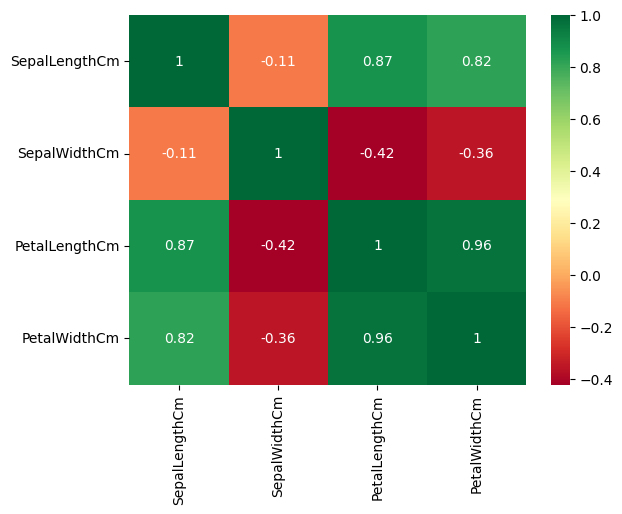

In [56]:
#correlation matrix using sns heatmap
import seaborn as sns
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 22 to 102
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  120 non-null    float64
 1   SepalWidthCm   120 non-null    float64
 2   PetalLengthCm  120 non-null    float64
 3   PetalWidthCm   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


XGBOOST

In [59]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [60]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100, "%")


Accuracy: 100.0 %


In [61]:
# Print classification report (includes precision, recall, f1-score, etc.)
class_names = label_encoder.classes_
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", classification_rep)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Decision Tree

In [65]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Print classification report (includes precision, recall, f1-score, etc.)
class_names = label_encoder.classes_
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", classification_rep)



Accuracy: 100.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

